In [39]:
from google.colab import drive
drive.mount("/content/drive/MyDrive/DABC/HW_21")

ValueError: Mountpoint must be in a directory that exists

In [4]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Preprocessing for Model #4

In [5]:
#  Import and read the charity_data.csv.
df_og = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df_og.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [7]:
df_og.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [8]:
# Drop the non-beneficial columns
df3 = df_og.copy()
df3 = df3.drop(columns=["EIN", "STATUS", "SPECIAL_CONSIDERATIONS"])
df3.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [9]:
df3.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [10]:
# Determine the number of unique values in each column.
# Skip "ASK_AMT" column because it's already numeric.
cols = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']

for col in cols:
  print(col)
  print(df3[col].value_counts())
  print()

NAME
NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

APPLICATION_TYPE
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8

In [11]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# Choose a cutoff value and create a list of application types to be replaced
app_type_threshold = 200
app_type_counts = df3['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace = app_type_counts.loc[app_type_counts < app_type_threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df3['APPLICATION_TYPE'] = df3['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df3['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [12]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_threshold = 150
class_counts = df3['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts.loc[class_counts < class_threshold].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df3['CLASSIFICATION'] = df3['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df3['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1003
C7000,777
C1700,287
C4000,194


In [13]:
# Additional bucketing for categories with small sample sizes
print(f"""{df3['ORGANIZATION'].value_counts()}\n
{df3['USE_CASE'].value_counts()}\n
{df3['AFFILIATION'].value_counts()}""")

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64


In [14]:
# Bucketing for ORGANIZATION
org_threshold = 1000
org_counts = df3['ORGANIZATION'].value_counts()
organizations_to_replace = org_counts.loc[org_counts < org_threshold].index.tolist()

# Replace in dataframe
for org in organizations_to_replace:
    df3['ORGANIZATION'] = df3['ORGANIZATION'].replace(org,"Other")

# Check to make sure replacement was successful
df3['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Other,529


In [15]:
# Bucketing for USE_CASE
use_case_threshold = 1000
use_case_counts = df3['USE_CASE'].value_counts()
use_cases_to_replace = use_case_counts.loc[use_case_counts < use_case_threshold].index.tolist()

# Replace in dataframe
for case in use_cases_to_replace:
    df3['USE_CASE'] = df3['USE_CASE'].replace(case,"Other")

# Check to make sure replacement was successful
df3['USE_CASE'].value_counts()

,count
USE_CASE,
Preservation,28095
ProductDev,5671
Other,533


In [16]:
# Bucketing for AFFILIATION
aff_threshold = 1000
aff_counts = df3['AFFILIATION'].value_counts()
affiliations_to_replace = aff_counts.loc[aff_counts < aff_threshold].index.tolist()

# Replace in dataframe
for aff in affiliations_to_replace:
    df3['AFFILIATION'] = df3['AFFILIATION'].replace(aff,"Other")

# Check to make sure replacement was successful
df3['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [17]:
# Bucketing for NAME
name_threshold = 250
name_counts = df3['NAME'].value_counts()
names_to_replace = name_counts.loc[name_counts < name_threshold].index.tolist()

# Replace in dataframe
for name in names_to_replace:
    df3['NAME'] = df3['NAME'].replace(name,"Other")

# Check to make sure replacement was successful
df3['NAME'].value_counts()

,count
NAME,
Other,28539
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
PTA TEXAS CONGRESS,368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,331
ALPHA PHI SIGMA,313


In [18]:
df3.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,Other,T3,Independent,C2000,Preservation,Other,1-9999,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,Other,T3,Independent,C1000,Other,Trust,100000-499999,142590,1


In [19]:
# View data types by column
df4 = df3.copy()
df4.info()
print(f"\n{df4.columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [20]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_cols = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']
cat_dummies = pd.get_dummies(df4[cat_cols], dtype=int)

# Concatenating with the original DataFrame
df4 = pd.concat([df4, cat_dummies], axis=1)

df4.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,Other,T10,Independent,C1000,ProductDev,Association,0,5000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,Other,T3,Independent,C2000,Preservation,Other,1-9999,108590,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Other,T3,Independent,C1000,Other,Trust,100000-499999,142590,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 58 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   NAME                                                    34299 non-null  object
 1   APPLICATION_TYPE                                        34299 non-null  object
 2   AFFILIATION                                             34299 non-null  object
 3   CLASSIFICATION                                          34299 non-null  object
 4   USE_CASE                                                34299 non-null  object
 5   ORGANIZATION                                            34299 non-null  object
 6   INCOME_AMT                                              34299 non-null  object
 7   ASK_AMT                                                 34299 non-null  int64 
 8   IS_SUCCESSFUL                                 

In [22]:
# Split our preprocessed data into our features and target arrays
X = df4.drop(columns=cat_cols + ["IS_SUCCESSFUL"])
y = df4.IS_SUCCESSFUL
X.columns

Index(['ASK_AMT', 'NAME_ALPHA PHI SIGMA',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC',
       'NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS',
       'NAME_LITTLE LEAGUE BASEBALL INC',
       'NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS', 'NAME_Other',
       'NAME_PARENT BOOSTER USA INC', 'NAME_PTA TEXAS CONGRESS',
       'NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC',
       'NAME_TOASTMASTERS INTERNATIONAL', 'NAME_TOPS CLUB INC',
       'NAME_UNITED STATES BOWLING CONGRESS INC',
       'NAME_WASHINGTON STATE UNIVERSITY', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLAS

In [23]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

## Function for Modeling

In [26]:
# Function for Classification
def classificationModeling(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Train Confusion Matrix:
    {train_cf}

    Train Classification Report:
    {train_cr}

    Train AUC: {train_auc}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Test Confusion Matrix:
    {test_cf}

    Test Classification Report:
    {test_cr}

    Test AUC: {test_auc}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

## Logistic Regression

TRAIN METRICS
    Train Confusion Matrix: 
    [[12028     0]
 [13696     0]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64     12028
           1       0.00      0.00      0.00     13696

    accuracy                           0.47     25724
   macro avg       0.23      0.50      0.32     25724
weighted avg       0.22      0.47      0.30     25724


    Train AUC: 0.6078813297350962
    
TEST METRICS
    Test Confusion Matrix: 
    [[4010    0]
 [4565    0]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64      4010
           1       0.00      0.00      0.00      4565

    accuracy                           0.47      8575
   macro avg       0.23      0.50      0.32      8575
weighted avg       0.22      0.47      0.30      8575


    Test AUC: 0.6202458803702682
    


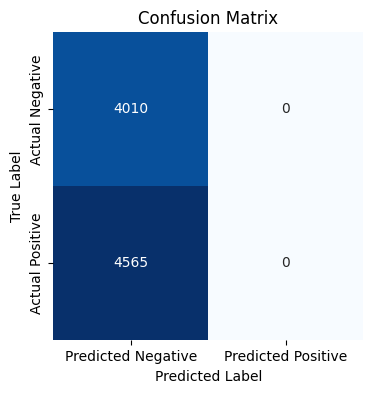

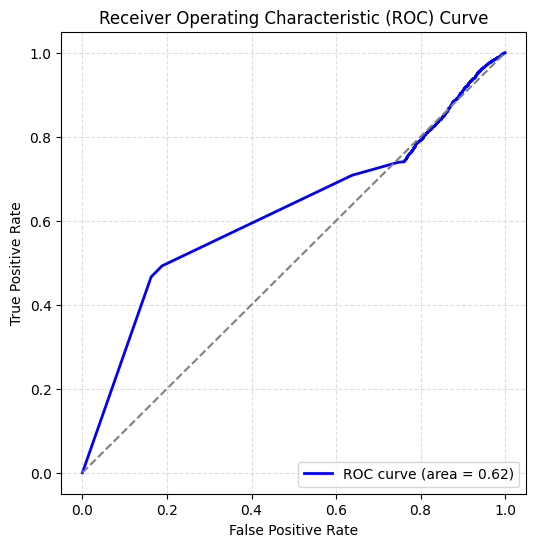

In [27]:
# Initiate the model
lr = LogisticRegression()

# Do Machine Learning
classificationModeling(lr, X_train, X_test, y_train, y_test)

## Decision Tree

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 9215  2813]
 [ 1325 12371]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.87      0.77      0.82     12028
           1       0.81      0.90      0.86     13696

    accuracy                           0.84     25724
   macro avg       0.84      0.83      0.84     25724
weighted avg       0.84      0.84      0.84     25724


    Train AUC: 0.9175235302061934
    
TEST METRICS
    Test Confusion Matrix: 
    [[2599 1411]
 [ 900 3665]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69      4010
           1       0.72      0.80      0.76      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575


    Test AUC: 0.7331600899175938
    


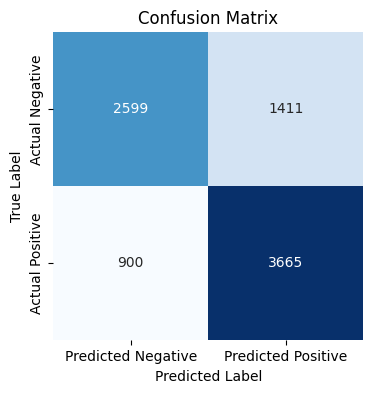

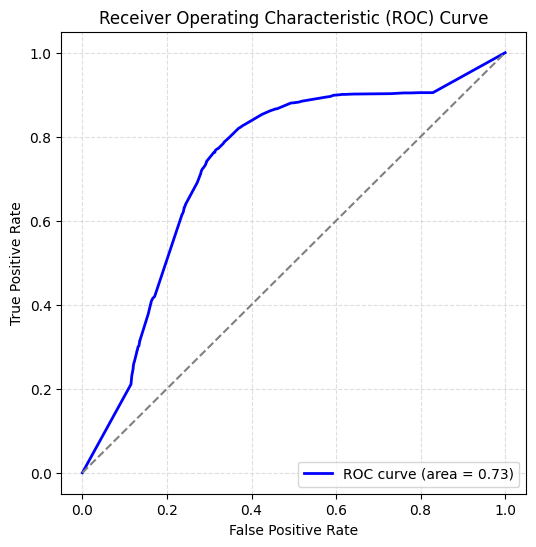

In [28]:
# Initiate the model
dt = DecisionTreeClassifier()

# Do Machine Learning
classificationModeling(dt, X_train, X_test, y_train, y_test)

## Random Forest

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 9192  2836]
 [ 1304 12392]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.88      0.76      0.82     12028
           1       0.81      0.90      0.86     13696

    accuracy                           0.84     25724
   macro avg       0.84      0.83      0.84     25724
weighted avg       0.84      0.84      0.84     25724


    Train AUC: 0.9016453121503485
    
TEST METRICS
    Test Confusion Matrix: 
    [[2608 1402]
 [ 839 3726]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.76      0.65      0.70      4010
           1       0.73      0.82      0.77      4565

    accuracy                           0.74      8575
   macro avg       0.74      0.73      0.73      8575
weighted avg       0.74      0.74      0.74      8575


    Test AUC: 0.793910650536856
    


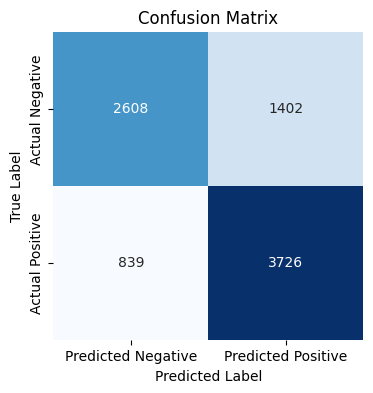

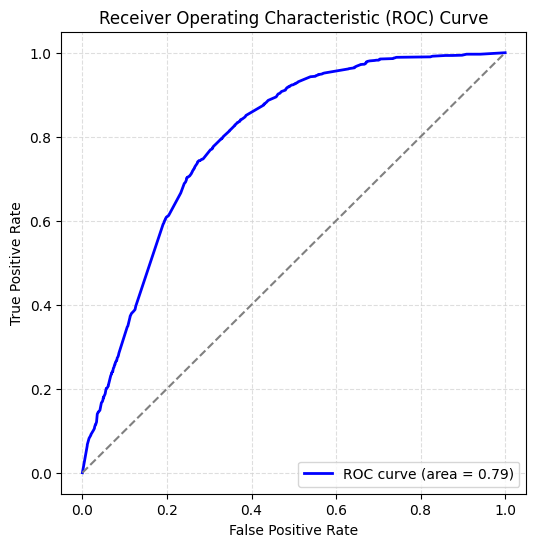

In [29]:
# Initiate the model
rf = RandomForestClassifier()

# Do Machine Learning
classificationModeling(rf, X_train, X_test, y_train, y_test)

## Support Vector Machine

TRAIN METRICS
    Train Confusion Matrix: 
    [[  151 11877]
 [   99 13597]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.60      0.01      0.02     12028
           1       0.53      0.99      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.57      0.50      0.36     25724
weighted avg       0.57      0.53      0.38     25724


    Train AUC: 0.598882816312172
    
TEST METRICS
    Test Confusion Matrix: 
    [[  39 3971]
 [  28 4537]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.58      0.01      0.02      4010
           1       0.53      0.99      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.56      0.50      0.36      8575
weighted avg       0.56      0.53      0.38      8575


    Test AUC: 0.6051165623728193
    


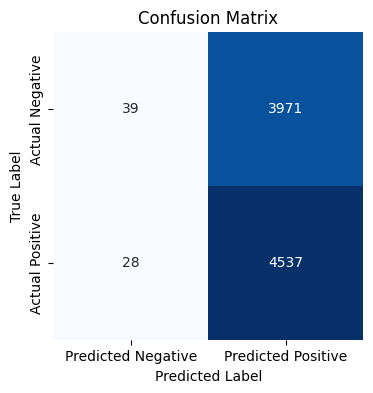

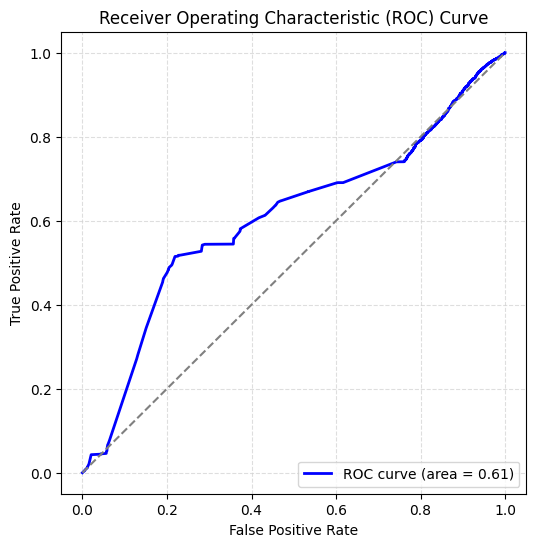

In [30]:
# Initiate the model
svc = SVC(probability=True)

# Do Machine Learning
classificationModeling(svc, X_train, X_test, y_train, y_test)

## K-Nearest Neighbors

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 6687  5341]
 [ 1755 11941]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.56      0.65     12028
           1       0.69      0.87      0.77     13696

    accuracy                           0.72     25724
   macro avg       0.74      0.71      0.71     25724
weighted avg       0.74      0.72      0.72     25724


    Train AUC: 0.7926529953278797
    
TEST METRICS
    Test Confusion Matrix: 
    [[2177 1833]
 [ 642 3923]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.77      0.54      0.64      4010
           1       0.68      0.86      0.76      4565

    accuracy                           0.71      8575
   macro avg       0.73      0.70      0.70      8575
weighted avg       0.72      0.71      0.70      8575


    Test AUC: 0.7828595269766437
    


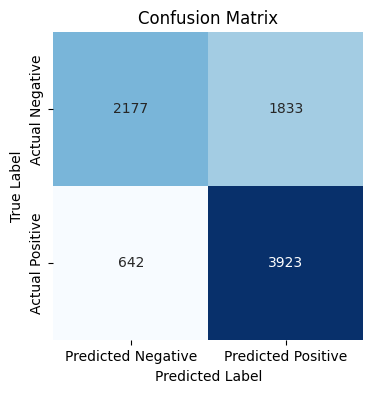

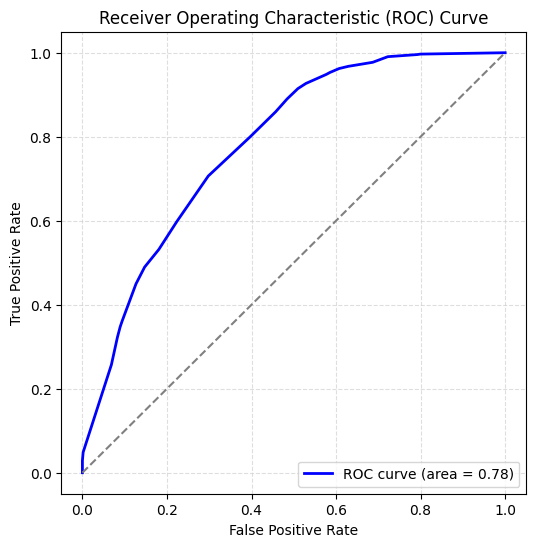

In [31]:
# Initiate the model
knn = KNeighborsClassifier(n_neighbors=25)

# Do Machine Learning
classificationModeling(knn, X_train, X_test, y_train, y_test)

## Extra Trees Classifier

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 9215  2813]
 [ 1325 12371]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.87      0.77      0.82     12028
           1       0.81      0.90      0.86     13696

    accuracy                           0.84     25724
   macro avg       0.84      0.83      0.84     25724
weighted avg       0.84      0.84      0.84     25724


    Train AUC: 0.9175235302061934
    
TEST METRICS
    Test Confusion Matrix: 
    [[2621 1389]
 [ 859 3706]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.65      0.70      4010
           1       0.73      0.81      0.77      4565

    accuracy                           0.74      8575
   macro avg       0.74      0.73      0.73      8575
weighted avg       0.74      0.74      0.74      8575


    Test AUC: 0.7750974425928607
    


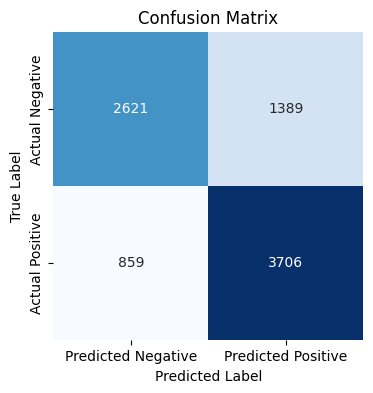

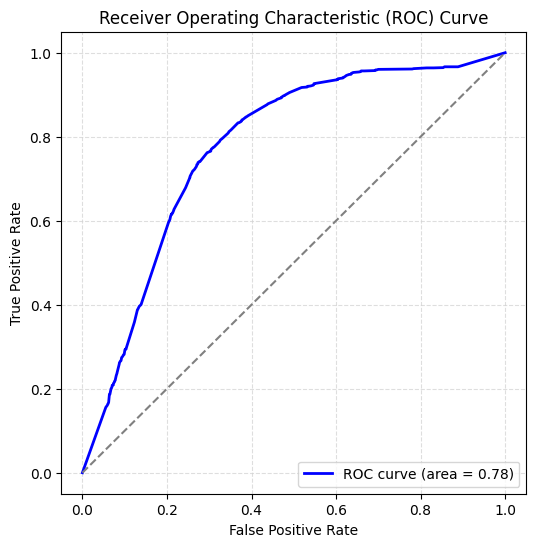

In [32]:
# Initiate the model
et = ExtraTreesClassifier()

# Do Machine Learning
classificationModeling(et, X_train, X_test, y_train, y_test)

## Adaptive Boost Classifier

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 8063  3965]
 [ 2943 10753]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70     12028
           1       0.73      0.79      0.76     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724


    Train AUC: 0.7956376466982026
    
TEST METRICS
    Test Confusion Matrix: 
    [[2671 1339]
 [ 976 3589]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      4010
           1       0.73      0.79      0.76      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575


    Test AUC: 0.7971040634995208
    


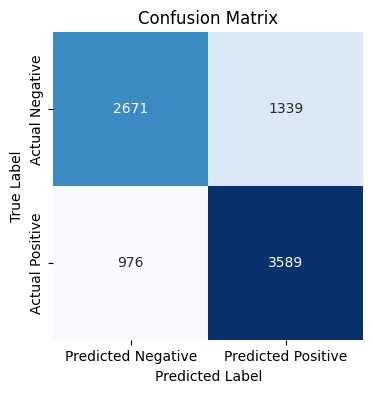

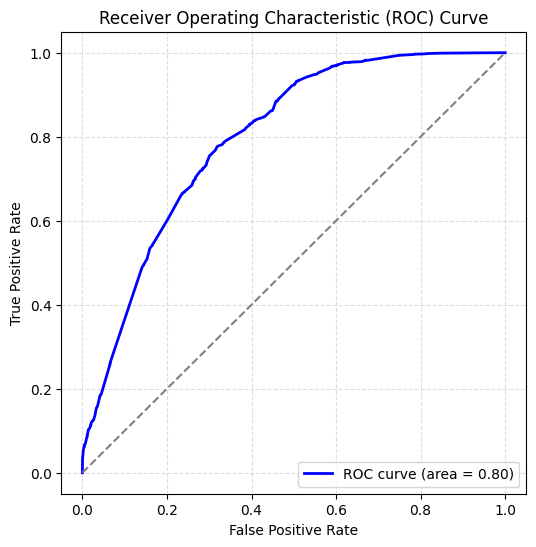

In [33]:
# Initiate the model
ada = AdaBoostClassifier()

# Do Machine Learning
classificationModeling(ada, X_train, X_test, y_train, y_test)

## Gradient Boosting Classifier

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 8140  3888]
 [ 2820 10876]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.68      0.71     12028
           1       0.74      0.79      0.76     13696

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724


    Train AUC: 0.8074100584811451
    
TEST METRICS
    Test Confusion Matrix: 
    [[2673 1337]
 [ 931 3634]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.67      0.70      4010
           1       0.73      0.80      0.76      4565

    accuracy                           0.74      8575
   macro avg       0.74      0.73      0.73      8575
weighted avg       0.74      0.74      0.73      8575


    Test AUC: 0.8062754668640557
    


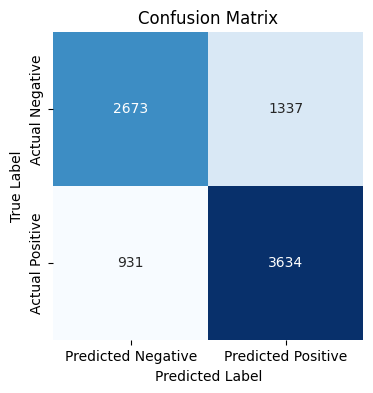

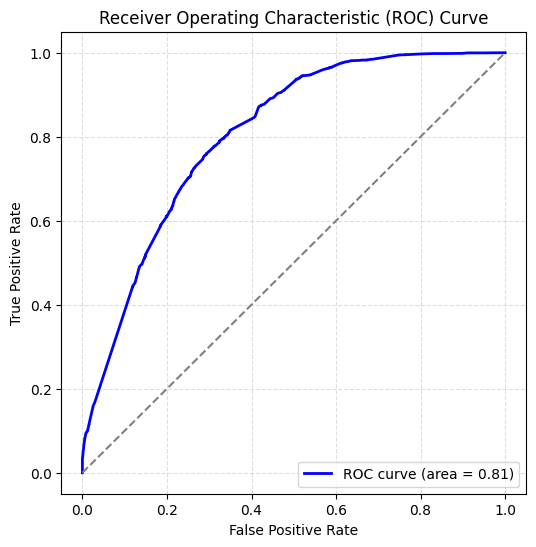

In [34]:
# Initiate the model
gb = GradientBoostingClassifier(random_state=1)

# Do Machine Learning
classificationModeling(gb, X_train, X_test, y_train, y_test)

## Extra Gradient Boosting Classifier

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 7959  4069]
 [ 1786 11910]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.66      0.73     12028
           1       0.75      0.87      0.80     13696

    accuracy                           0.77     25724
   macro avg       0.78      0.77      0.77     25724
weighted avg       0.78      0.77      0.77     25724


    Train AUC: 0.842068732026945
    
TEST METRICS
    Test Confusion Matrix: 
    [[2529 1481]
 [ 676 3889]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.63      0.70      4010
           1       0.72      0.85      0.78      4565

    accuracy                           0.75      8575
   macro avg       0.76      0.74      0.74      8575
weighted avg       0.75      0.75      0.74      8575


    Test AUC: 0.8129538148058113
    


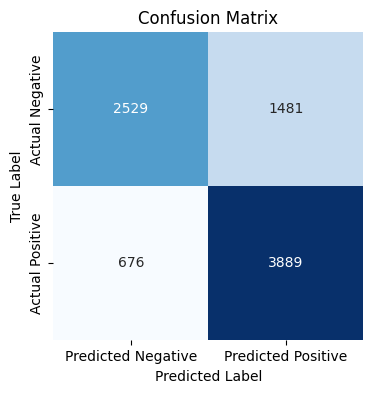

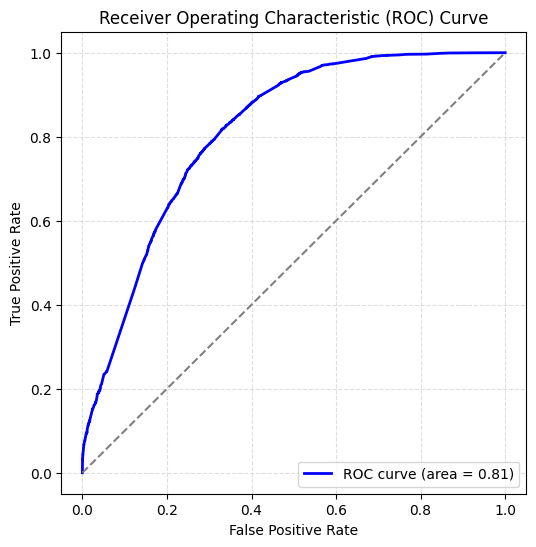

In [37]:
# Initiate the model
xgb = XGBClassifier(random_state=1)

# Do Machine Learning
classificationModeling(xgb, X_train, X_test, y_train, y_test)

## Light Gradient Boost Classifier

TRAIN METRICS
    Train Confusion Matrix: 
    [[ 8063  3965]
 [ 2943 10753]]

    Train Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70     12028
           1       0.73      0.79      0.76     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724


    Train AUC: 0.7956376466982026
    
TEST METRICS
    Test Confusion Matrix: 
    [[2671 1339]
 [ 976 3589]]

    Test Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      4010
           1       0.73      0.79      0.76      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575


    Test AUC: 0.7971040634995208
    


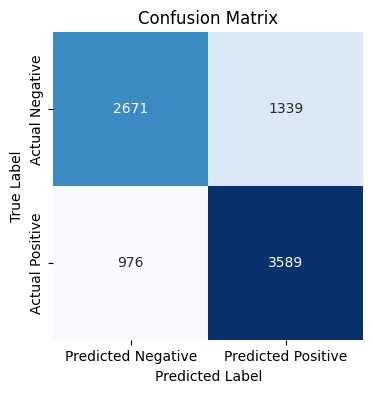

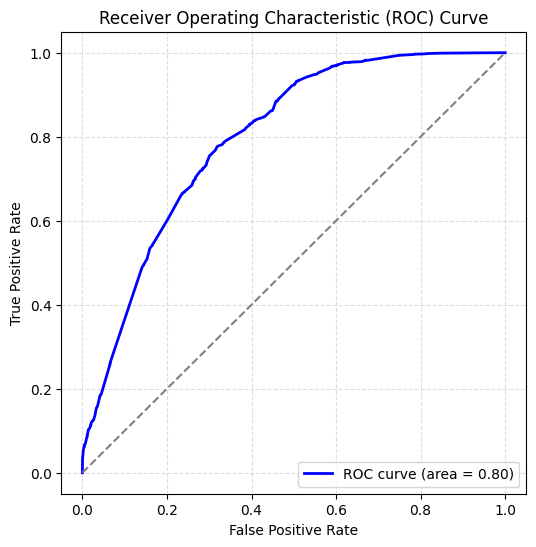

In [38]:
# Initiate the model
lgbm = LGBMClassifier(random_state=1, verbose=-1)

# Do Machine Learning
classificationModeling(ada, X_train, X_test, y_train, y_test)

In [40]:
# The Extra Gradient Boosting CLassifier model gives the highest accuracy score at 81.3%.